In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.copy_on_write = True


In [26]:
data_set_list = ['blood', 'organa', 'pneumonia']  

merged_data = pd.DataFrame()

for data_set in data_set_list:
    df = pd.read_csv(f'{data_set}.csv')
    df['data_set'] = data_set  
    merged_data = pd.concat([merged_data, df], ignore_index=True)

filtered_data_with_100_epoch = merged_data[merged_data['epoch'] == 100]
filtered_data_with_100_epoch['gan_data_set'] = filtered_data_with_100_epoch['gan'] + ' in ' + filtered_data_with_100_epoch['data_set']

filtered_data_with_100_epoch['embedding'] = filtered_data_with_100_epoch['embedding'].astype(str)

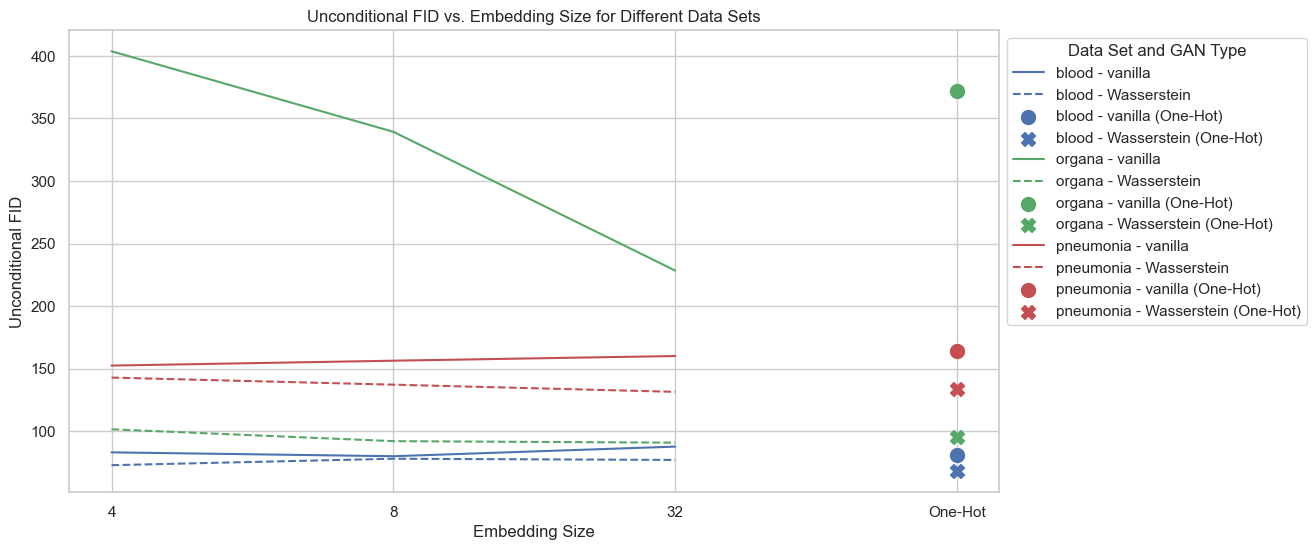

In [42]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))


line_styles = {'vanilla': '-', 'Wasserstein': '--'}
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']


for idx, data_set in enumerate(data_set_list):
    current_data = filtered_data_with_100_epoch[filtered_data_with_100_epoch['data_set'] == data_set]

    embedding_zero_data = current_data[current_data['embedding'] == '0']
    line_data = current_data[current_data['embedding'] != '0']
    
    for gan_type, line_style in line_styles.items():
        gan_data = line_data[line_data['gan'] == gan_type]
        plt.plot(gan_data['embedding'], gan_data['unconditional_fid'], line_style, label=f'{data_set} - {gan_type}', color=colors[idx])

    for gan_type in embedding_zero_data['gan'].unique():
        gan_data = embedding_zero_data[embedding_zero_data['gan'] == gan_type]
        marker_style = 'o' if gan_type == 'vanilla' else 'X'
        plt.scatter(gan_data['embedding'], gan_data['unconditional_fid'], label=f'{data_set} - {gan_type} (One-Hot)', marker=marker_style,
                    color=colors[idx], s=100, zorder=5)


plt.title('Unconditional FID vs. Embedding Size for Different Data Sets')
plt.xlabel('Embedding Size')
plt.ylabel('Unconditional FID')


plt.legend(title='Data Set and GAN Type', loc='upper left', bbox_to_anchor=(1, 1))

locs, labels = plt.xticks()


new_labels = [label.get_text().replace('0', 'One-Hot') for label in labels]
plt.xticks(locs, new_labels)

plt.savefig(f'Figures/Merged_unconditional_FID.png', bbox_inches='tight')

plt.show()
